In [27]:
!pip install graphviz

In [28]:
import pandas as pd
import requests

# URL for the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Column names for the dataset (based on the dataset description)
# This dataset does not have a header row, so we need to provide column names
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Download the dataset
response = requests.get(url)
with open("heart_disease.csv", "wb") as f:
    f.write(response.content)

# Load the dataset into a pandas DataFrame
df = pd.read_csv("heart_disease.csv", names=column_names, na_values='?')

# Display the first few rows and the info to check the data loading
display(df.head())
display(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


None

In [29]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (227, 13)
Testing set shape: (76, 13)


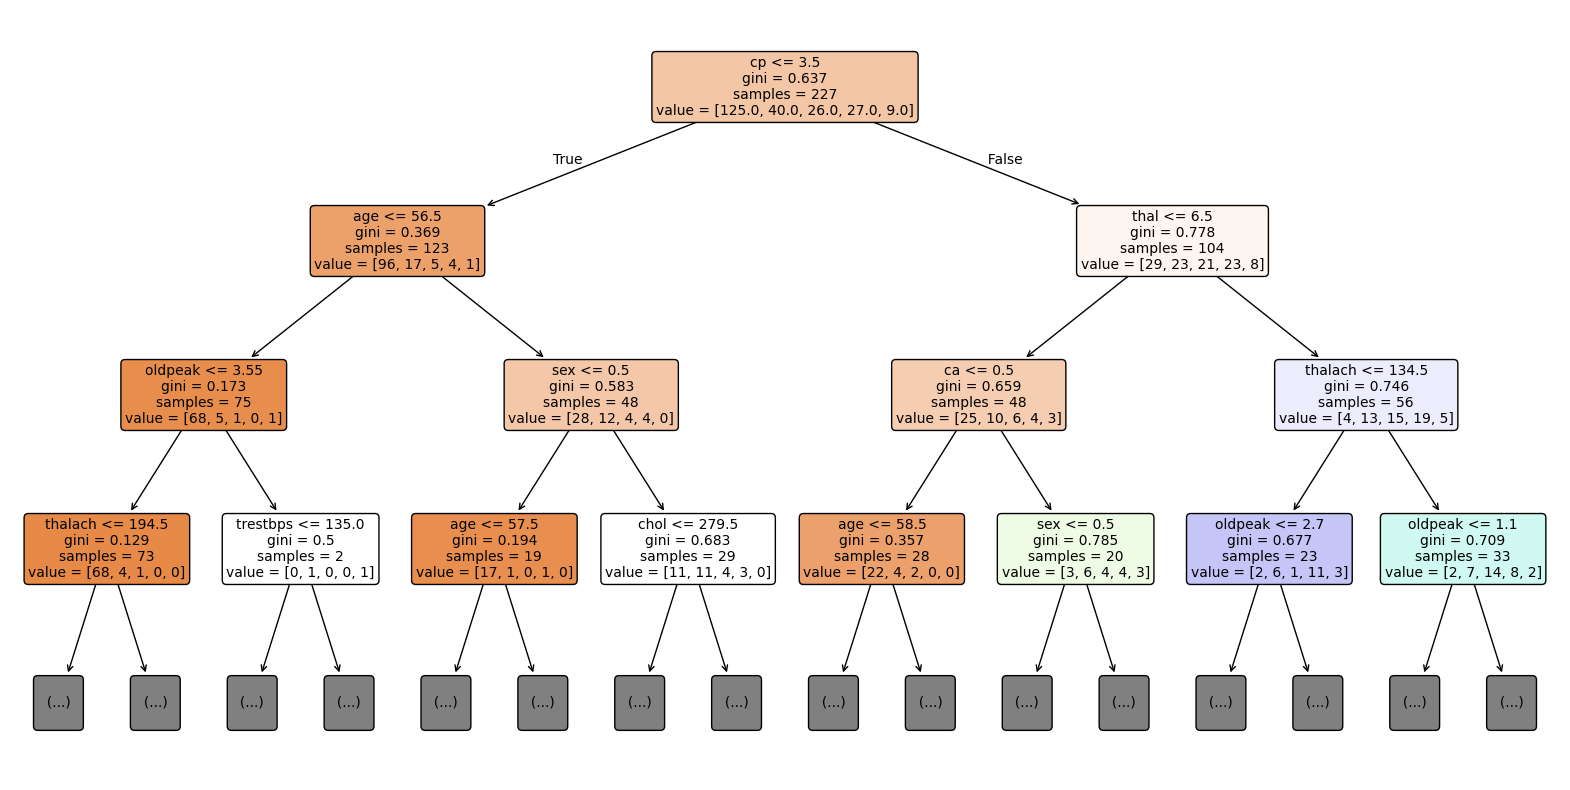

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Visualize the Decision Tree (simplified for readability)
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=3) # Limiting depth for visualization
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

# Evaluate the Decision Tree on the training set
y_train_pred = decision_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the Decision Tree on the testing set
y_test_pred = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.5000


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees
random_forest.fit(X_train, y_train)

print("Random Forest Classifier trained successfully!")

Random Forest Classifier trained successfully!


In [33]:
from sklearn.metrics import accuracy_score

# Evaluate the Random Forest on the testing set
y_test_pred_rf = random_forest.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.4f}")

# We already calculated Decision Tree testing accuracy in a previous step
print(f"Decision Tree Testing Accuracy: {test_accuracy:.4f}")

Random Forest Testing Accuracy: 0.5526
Decision Tree Testing Accuracy: 0.5000


Feature Importances (Random Forest):


,0
thalach,0.143189
oldpeak,0.119289
age,0.115757
chol,0.102959
ca,0.096918
trestbps,0.090978
thal,0.080627
cp,0.079667
exang,0.049209
slope,0.038679


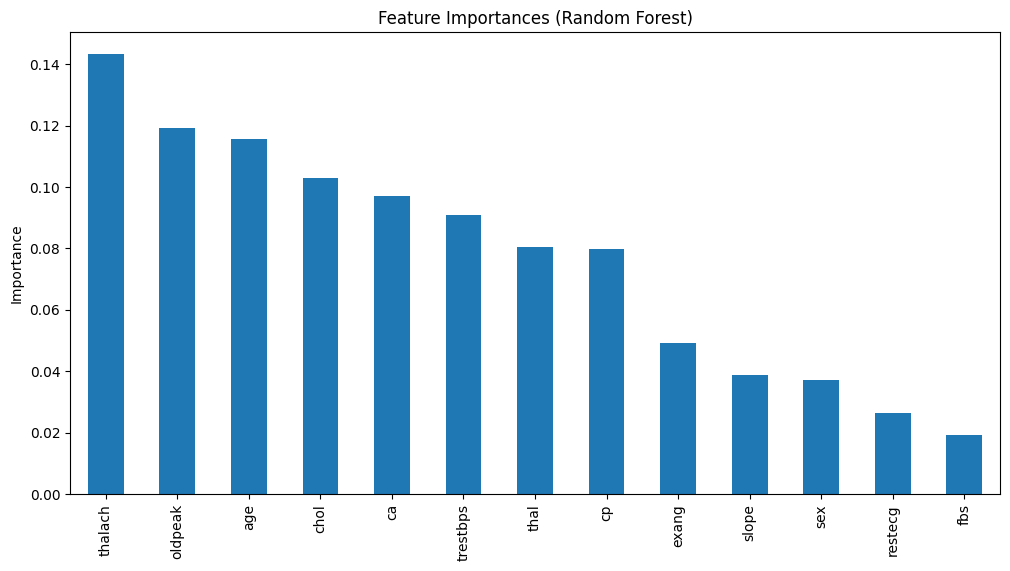

In [34]:
# Get feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Display the sorted feature importances
print("Feature Importances (Random Forest):")
display(sorted_feature_importances)

# Optional: Visualize feature importances
plt.figure(figsize=(12, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

# Evaluate Decision Tree using cross-validation
cv_scores_dt = cross_val_score(decision_tree, X, y, cv=5) # Using 5-fold cross-validation
print(f"Decision Tree Cross-Validation Accuracy: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std():.4f})")

# Evaluate Random Forest using cross-validation
cv_scores_rf = cross_val_score(random_forest, X, y, cv=5) # Using 5-fold cross-validation
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")

Decision Tree Cross-Validation Accuracy: 0.4883 (+/- 0.0632)
Random Forest Cross-Validation Accuracy: 0.5972 (+/- 0.0403)
